# Update ID in annotation volume to reflect ROI-division by gene expression

- inputs
    - AVbase_c.nrrd
    - AV_target_ROI_ID_382_gene_74881161.nrrd
- output
    - AVbase_c_g.nrrd

In [ ]:
ExpID = 74881161
Target_ROI_ID = 382

dir_data = 'data'
dir_fig = 'figs'
dir_gene = 'gene_data\\74881161\\'

fn_input_AV_ori = 'AVbase_c.nrrd'
fn_input_AV_gene = 'AV_target_ROI_ID_382_gene_74881161.nrrd'

fn_output_AV_update = 'AVbase_c_g.nrrd'

In [11]:
import os
import nrrd
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

# just used for displaying data
SliceIdx = 84
CoronalIdx = np.linspace(71,84,3)

# Load data

In [13]:
AV_ori, header = nrrd.read(os.path.join(dir_data, fn_input_AV_ori))
AV_gene, header_gene = nrrd.read(os.path.join(dir_data, fn_input_AV_gene))

# Check loaded data


In [14]:
np.max(AV_ori)

1000000028

## Gene expression

upper low: gene expression high
upper low: gene expression low


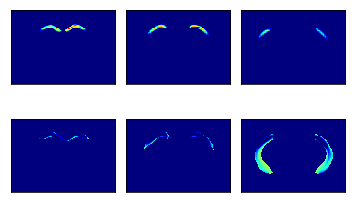

In [15]:
print('upper low: gene expression high')
print('upper low: gene expression low')
slices = [int(x) for x in CoronalIdx.round()]
fig1, ax1 = plt.subplots(2,len(CoronalIdx), facecolor='w')
for count, idx in enumerate(slices):
    H1 = ax1[0, count].imshow(AV_gene[idx,:,:], cmap='jet', vmin=0, vmax=20)
    H2 = ax1[1,count].imshow(-AV_gene[idx,:,:], cmap='jet', vmin=0, vmax=20)
    ax1[0,count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    ax1[1,count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.subplots_adjust(wspace=0.1, hspace=0)

In [16]:
print('# voxel with high gene expression:', np.sum(AV_gene > 0))
print('# voxel with low gene expression:', np.sum(AV_gene < 0))


# voxel with high gene expression: 3689
# voxel with low gene expression: 6589


# Get candidate ID

In [17]:
if AV_ori.max() < 10**9:
    CandidateID = 10**9
else:
    CandidateID = AV_ori.max() + 1


# Update ID in AV to reflect gene expression


In [18]:
AV_update = copy.deepcopy(AV_ori)
AV_update[AV_gene > 0] = CandidateID

# Save AV

In [19]:
nrrd.write(os.path.join(dir_data, fn_output_AV_update), AV_update, header)

# Check updated AV

Target ROI ID: 382


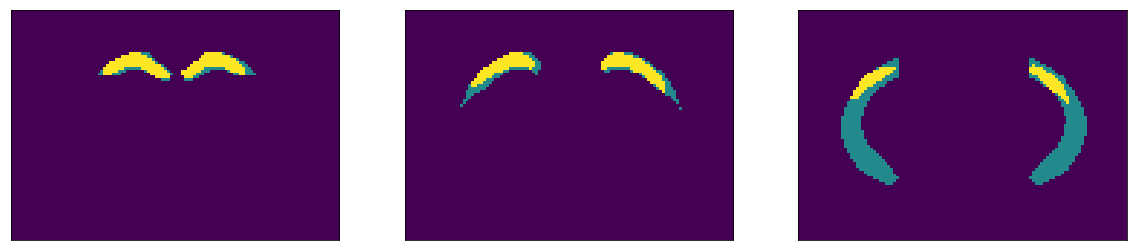

In [20]:
print('Target ROI ID: '+str(Target_ROI_ID))

AV_targetROI = AV_ori == Target_ROI_ID

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

fig2, ax2 = plt.subplots(1,len(CoronalIdx), figsize=(20,28), facecolor='w')
for count, idx in enumerate(slices):
    ax2[count].imshow(AV_update[idx,:,:] *AV_targetROI[idx,:,:],\
                      aspect='equal', vmin=0, vmax=800)
    ax2[count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)